In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
data = pd.read_csv('cart_model_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               614 non-null    int64  
 1   Gender                   614 non-null    object 
 2   Married                  614 non-null    object 
 3   Dependents               614 non-null    object 
 4   Education                614 non-null    object 
 5   Self_Employed            614 non-null    object 
 6   ApplicantIncome_Label    613 non-null    object 
 7   CoapplicantIncome_Label  614 non-null    object 
 8   LoanAmount_Label         613 non-null    object 
 9   Term                     614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Property_Area            614 non-null    object 
 12  Decision                 614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


In [4]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Label,CoapplicantIncome_Label,LoanAmount_Label,Term,Credit_History,Property_Area,Decision
0,0,Male,No,0,Graduate,No,Low,Low,Few,0.061966,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,Low,Low,Few,0.061966,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,Low,Low,Few,0.061966,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,Low,Low,Few,0.061966,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,Low,Low,Few,0.061966,1.0,Urban,Y


EDA

In [5]:
data.isnull().sum()

Unnamed: 0                 0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome_Label      1
CoapplicantIncome_Label    0
LoanAmount_Label           1
Term                       0
Credit_History             0
Property_Area              0
Decision                   0
dtype: int64

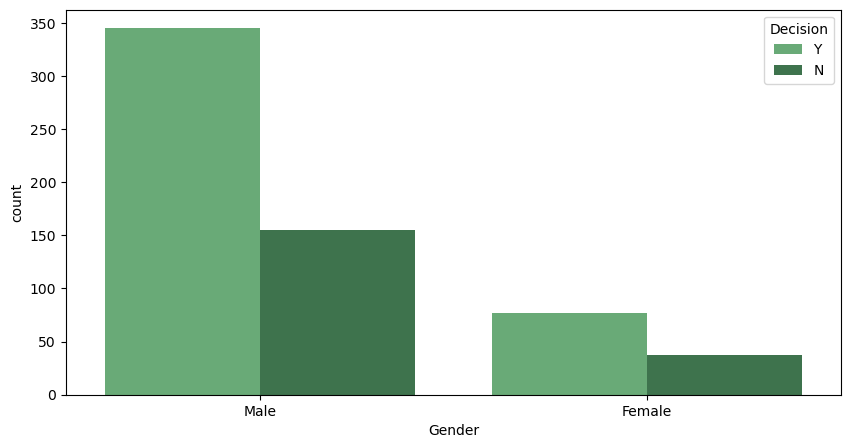

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Decision',palette='Greens_d')
plt.show()

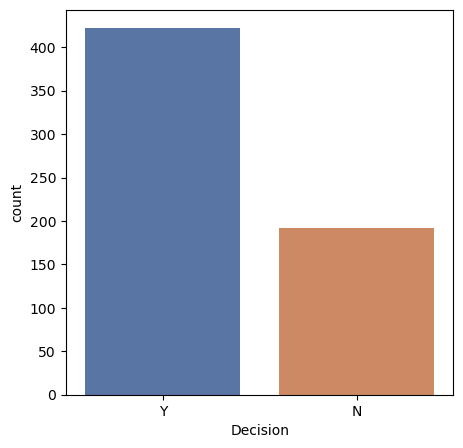

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='Decision',data=data,palette='deep')
plt.show()

In [8]:
label_encoder = preprocessing.LabelEncoder()
data['Decision']= label_encoder.fit_transform(data['Decision'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Education']= label_encoder.fit_transform(data['Education'])
data['Married']= label_encoder.fit_transform(data['Married'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['ApplicantIncome_Label']= label_encoder.fit_transform(data['ApplicantIncome_Label'])
data['CoapplicantIncome_Label']= label_encoder.fit_transform(data['CoapplicantIncome_Label'])
data['LoanAmount_Label']= label_encoder.fit_transform(data['LoanAmount_Label'])
data['Term']= label_encoder.fit_transform(data['Term'])
data['Credit_History']= label_encoder.fit_transform(data['Credit_History'])
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])

In [9]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Label,CoapplicantIncome_Label,LoanAmount_Label,Term,Credit_History,Property_Area,Decision
0,0,1,0,0,0,0,0,0,0,8,1,2,1
1,1,1,1,1,0,0,0,0,0,8,1,0,0
2,2,1,1,0,0,1,0,0,0,8,1,2,1
3,3,1,1,0,1,0,0,0,0,8,1,2,1
4,4,1,0,0,0,0,0,0,0,8,1,2,1


In [10]:
y = data['Decision']
X = data.drop(['Decision'], axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
ytrain

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Decision, Length: 491, dtype: int32

In [12]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
# model = DecisionTreeClassifier()
model = model.fit(xtrain, ytrain)

[Text(0.4166666666666667, 0.9, 'Credit_History <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]\nclass = 0'),
 Text(0.19047619047619047, 0.7, 'Dependents <= 2.5\ngini = 0.232\nsamples = 82\nvalue = [71, 11]\nclass = 1'),
 Text(0.09523809523809523, 0.5, 'Unnamed: 0 <= 129.5\ngini = 0.193\nsamples = 74\nvalue = [66, 8]\nclass = 1'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 1'),
 Text(0.14285714285714285, 0.3, 'Unnamed: 0 <= 219.5\ngini = 0.225\nsamples = 62\nvalue = [54, 8]\nclass = 1'),
 Text(0.09523809523809523, 0.1, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]\nclass = 1'),
 Text(0.19047619047619047, 0.1, 'gini = 0.147\nsamples = 50\nvalue = [46, 4]\nclass = 1'),
 Text(0.2857142857142857, 0.5, 'Unnamed: 0 <= 166.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = 1'),
 Text(0.23809523809523808, 0.3, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass 

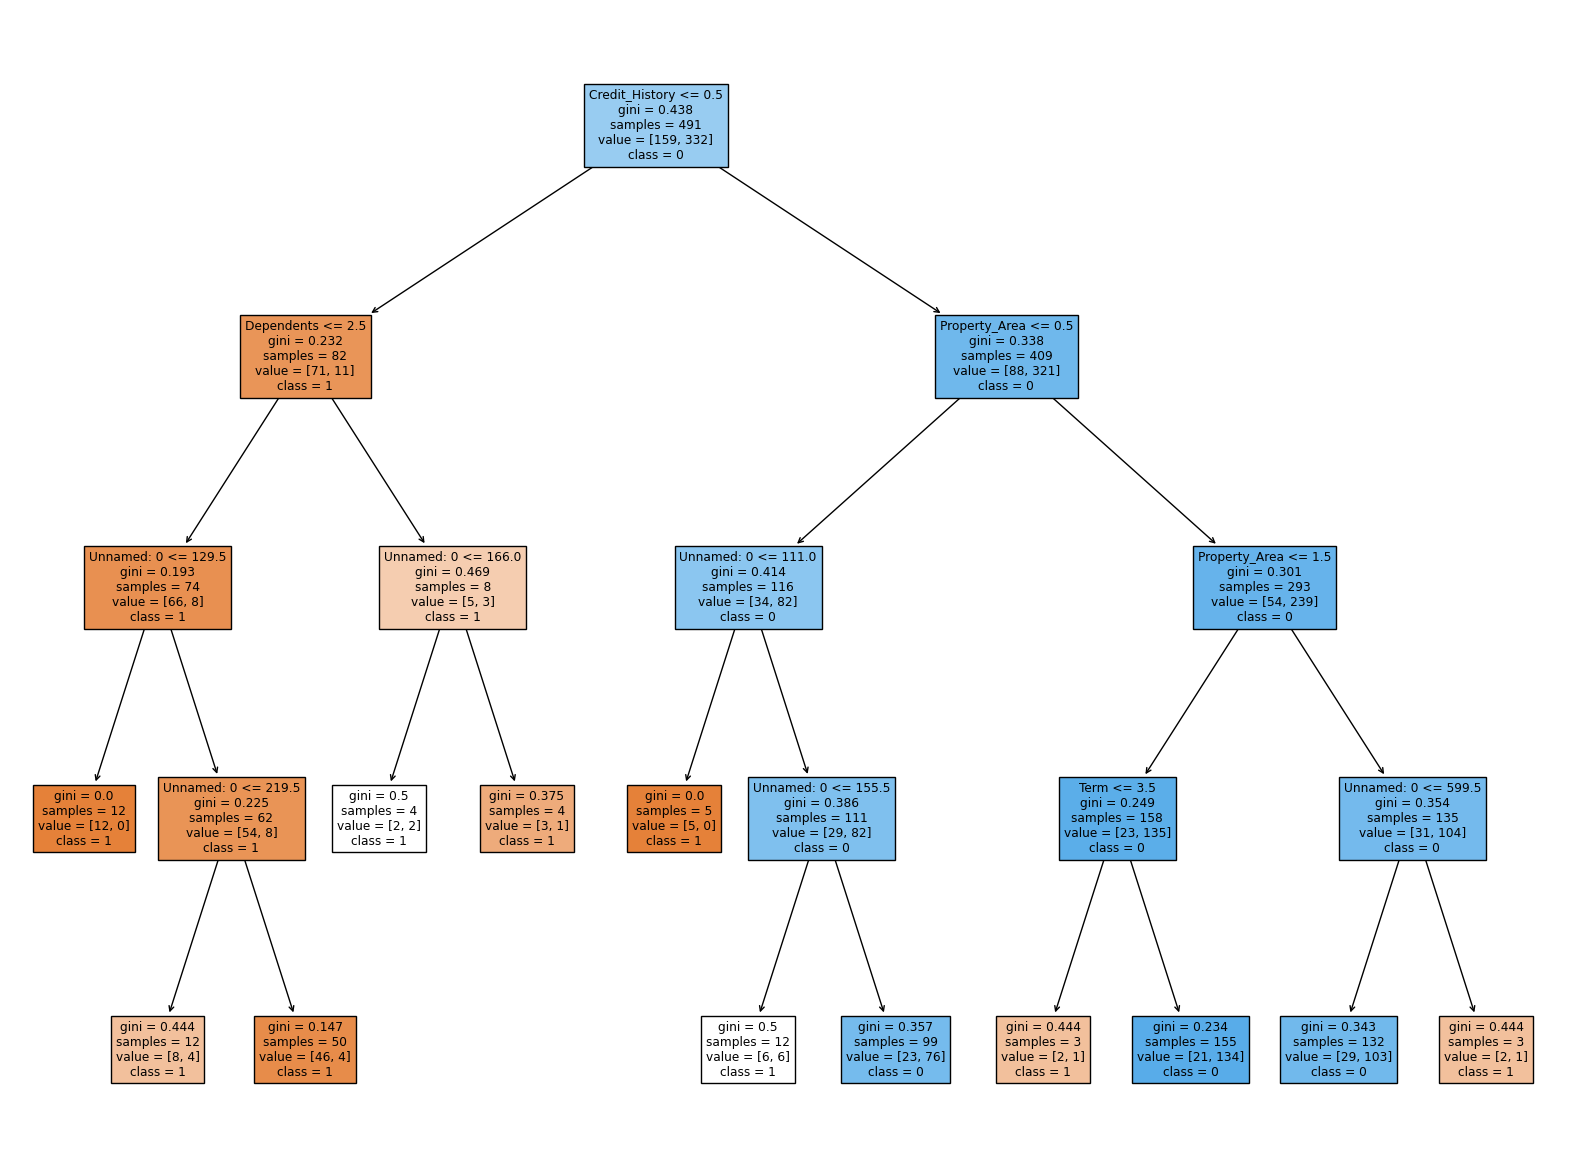

In [13]:
dt_feature_names = list(xtrain.columns)
dt_target_names = [str(s) for s in ytrain.unique()]
plt.figure(figsize = (20,15))
plot_tree(model,feature_names = dt_feature_names, class_names = dt_target_names, filled = True)

In [14]:
y_pred_test = model.predict(xtest)
print(confusion_matrix(ytest, y_pred_test))
print(classification_report(ytest, y_pred_test))

[[18 15]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.85      0.93      0.89        90

    accuracy                           0.83       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123



In [15]:
y_pred_train = model.predict(xtrain)
print(confusion_matrix(ytrain, y_pred_train))
print(classification_report(ytrain, y_pred_train))

[[ 86  73]
 [ 19 313]]
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       159
           1       0.81      0.94      0.87       332

    accuracy                           0.81       491
   macro avg       0.81      0.74      0.76       491
weighted avg       0.81      0.81      0.80       491

